In [1]:

import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
#from ipynb.fs.full.Hide import hide_toggle # this function has to be in the same directory!
# pip install finta!!! the only site that has inverse fisher transform!

In [2]:
symbol ="GC=F"
num_name= symbol.split(' ') 
data_frames_separate = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='1d',start="2020-11-01",end="2021-02-06")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        data_frames_separate.append(data)

data_frames_separate[0]

,Date,Open,High,Low,Close
Date,,,,,
2020-11-02,18568.0,1872.900024,1894.699951,1872.900024,1890.400024
2020-11-03,18569.0,1891.500000,1908.500000,1891.500000,1908.500000
2020-11-04,18570.0,1893.800049,1907.000000,1885.300049,1894.599976
2020-11-05,18571.0,1901.699951,1948.000000,1901.699951,1945.300049
2020-11-06,18572.0,1940.800049,1958.800049,1940.800049,1950.300049
...,...,...,...,...,...
2021-02-01,18659.0,1866.599976,1871.900024,1850.000000,1860.800049
2021-02-02,18660.0,1859.599976,1861.300049,1827.599976,1830.500000
2021-02-03,18661.0,1834.800049,1842.400024,1829.800049,1832.199951


<AxesSubplot:xlabel='Date'>

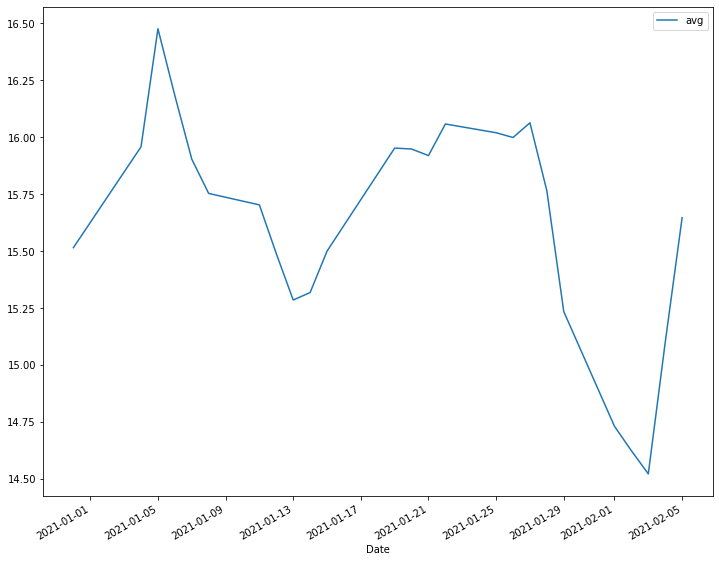

In [3]:
data_frames_separate[0]['avg'] = talib.ADX(data_frames_separate[0]['High'],data_frames_separate[0]['Low'], data_frames_separate[0]['Close'], timeperiod=20)
data_frames_separate[0][['avg']].plot(figsize=(12,10))